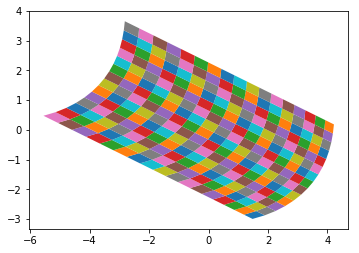

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from shapely.geometry.polygon import Polygon
from shapely.geometry import MultiPolygon

import cell_tree2d

# create a rotated Cartesian grid
xc, yc = np.mgrid[1:10:15j, 1:20:18j]
yc = yc**1.2 + xc**1.5

def rot2d(x, y, ang):
    '''rotate vectors by geometric angle'''
    xr = x*np.cos(ang) - y*np.sin(ang)
    yr = x*np.sin(ang) + y*np.cos(ang)
    return xr, yr

x, y = rot2d(xc, yc, 0.2)
y /= 10.0

x -= x.mean()
y -= y.mean()


# Create nodes and faces from grid
nodes = np.ascontiguousarray(np.column_stack((x[:].reshape(-1),
                                              y[:].reshape(-1)))).astype(np.float64)
y_size = x.shape[0]
x_size = y.shape[1]
faces = np.array([np.array([[xi, xi + 1, xi + x_size + 1, xi + x_size]
                            for xi in range(0, x_size - 1, 1)]) + yi * x_size for yi in range(0, y_size - 1)])
faces = np.ascontiguousarray(faces.reshape(-1, 4).astype(np.int32))

squares = [nodes[face] for face in faces]

## Convert to a bunch of shapely Polygon objects, for some unknown use.
mesh = MultiPolygon([Polygon(p) for p in squares])

# Extra functions for plotting the grid
patches = []
for square in squares:
  
    x, y = square.T
    plt.fill(x, y)

plt.gca().set_aspect(1.0)
plt.show()


# Create some trial points and locate them using cell_tree
xyi = np.random.randn(10, 2)

ct = cell_tree2d.CellTree(nodes, faces)
idx = ct.locate(xyi)

In [3]:
faces

array([[  0,   1,  19,  18],
       [  1,   2,  20,  19],
       [  2,   3,  21,  20],
       [  3,   4,  22,  21],
       [  4,   5,  23,  22],
       [  5,   6,  24,  23],
       [  6,   7,  25,  24],
       [  7,   8,  26,  25],
       [  8,   9,  27,  26],
       [  9,  10,  28,  27],
       [ 10,  11,  29,  28],
       [ 11,  12,  30,  29],
       [ 12,  13,  31,  30],
       [ 13,  14,  32,  31],
       [ 14,  15,  33,  32],
       [ 15,  16,  34,  33],
       [ 16,  17,  35,  34],
       [ 18,  19,  37,  36],
       [ 19,  20,  38,  37],
       [ 20,  21,  39,  38],
       [ 21,  22,  40,  39],
       [ 22,  23,  41,  40],
       [ 23,  24,  42,  41],
       [ 24,  25,  43,  42],
       [ 25,  26,  44,  43],
       [ 26,  27,  45,  44],
       [ 27,  28,  46,  45],
       [ 28,  29,  47,  46],
       [ 29,  30,  48,  47],
       [ 30,  31,  49,  48],
       [ 31,  32,  50,  49],
       [ 32,  33,  51,  50],
       [ 33,  34,  52,  51],
       [ 34,  35,  53,  52],
       [ 36,  

In [4]:
squares = [nodes[face] for face in faces]

In [6]:
squares[0]

array([[ 1.48036463, -2.99535709],
       [ 1.19020703, -2.85221786],
       [ 1.60057806, -2.73107877],
       [ 1.89073566, -2.87421801]])